<a href="https://colab.research.google.com/github/EduBrazGomes/ProjetoIntegrador/blob/main/Quest%C3%A3o10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Etapa 1: Configurar o ambiente e baixar o dataset de vendas

# 1. Instalar a biblioteca da API do Kaggle
!pip install kaggle

# 2. Fazer o upload do seu arquivo kaggle.json
#    Vá em sua conta no Kaggle -> Account -> API -> Create New API Token
print("\nPor favor, faça o upload do seu arquivo 'kaggle.json'")
from google.colab import files
files.upload()

# 3. Mover o arquivo para o diretório correto e definir permissões
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 4. Baixar o dataset da competição Rossmann Store Sales do Kaggle
print("\nBaixando o dataset Rossmann Store Sales...")
!kaggle competitions download -c rossmann-store-sales

# 5. Descompactar os arquivos do dataset
print("Descompactando os arquivos...")
!unzip -q rossmann-store-sales.zip -d rossmann_data

print("\nAmbiente pronto e dataset descompactado na pasta 'rossmann_data'!")


Por favor, faça o upload do seu arquivo 'kaggle.json'


Saving kaggle.json to kaggle.json

Baixando o dataset Rossmann Store Sales...
  0% 0.00/6.99M [00:00<?, ?B/s]
100% 6.99M/6.99M [00:00<00:00, 888MB/s]
Descompactando os arquivos...

Ambiente pronto e dataset descompactado na pasta 'rossmann_data'!


In [ ]:
# Etapa 2: Carregando, Explorando e Limpando os Dados

import pandas as pd

# 1. Carregar os datasets
print("--- Carregando os arquivos CSV ---")
# Caminhos para os arquivos dentro da pasta criada
train_path = 'rossmann_data/train.csv'
store_path = 'rossmann_data/store.csv'

# Carregando com pandas
# parse_dates=['Date'] converte a coluna 'Date' para o formato de data
train_df = pd.read_csv(train_path, parse_dates=['Date'], low_memory=False)
store_df = pd.read_csv(store_path)

print("Datasets carregados com sucesso!")

# 2. Explorar os dados iniciais
print("\n--- Informações do Dataset de Treino ---")
print(train_df.info())
print("\nPrimeiras 5 linhas do dataset de treino:")
print(train_df.head())

print("\n--- Informações do Dataset de Lojas ---")
print(store_df.info())
print("\nPrimeiras 5 linhas do dataset de lojas:")
print(store_df.head())


# 3. Juntar (merge) os dois datasets
print("\n--- Juntando os datasets de treino e lojas ---")
# Usamos um 'left merge' para manter todas as vendas do dataset de treino
merged_df = pd.merge(train_df, store_df, on='Store', how='left')

print("Datasets juntados com sucesso!")
print("\nPrimeiras 5 linhas do dataset combinado:")
print(merged_df.head())


# 4. Limpeza de Dados (tratando valores nulos)
print("\n--- Verificando e tratando valores nulos ---")
print("Contagem de nulos antes do tratamento:")
print(merged_df.isnull().sum())

# Tratando 'CompetitionDistance' com a mediana
median_dist = merged_df['CompetitionDistance'].median()
merged_df['CompetitionDistance'].fillna(median_dist, inplace=True)

# Tratando outras colunas relacionadas a competidores e promoções
# Assumimos que nulo significa 0 (sem competidor ou sem promoção)
merged_df.fillna(0, inplace=True)

print("\nContagem de nulos após o tratamento:")
print(merged_df.isnull().sum())
print("\nLimpeza de dados concluída!")

--- Carregando os arquivos CSV ---
Datasets carregados com sucesso!

--- Informações do Dataset de Treino ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB
None

Primeiras 5 linhas do dataset de treino:
   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \


/tmp/ipython-input-2053481275.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['CompetitionDistance'].fillna(median_dist, inplace=True)



Contagem de nulos após o tratamento:
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Limpeza de dados concluída!


In [ ]:
# Etapa 3: Engenharia de Características (Feature Engineering)

print("--- Iniciando a Engenharia de Características ---")

# 1. Extrair features da coluna 'Date'
print("Extraindo Ano, Mês, Dia e Semana do Ano da data...")
df = merged_df.copy() # Criar uma cópia para trabalhar
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)


# 2. Filtrar dados onde a loja está aberta e as vendas são maiores que zero
#    Isso é importante porque não queremos que o modelo aprenda a prever 'zero'
print("Removendo dias em que as lojas estavam fechadas...")
df = df[df['Open'] == 1]
df = df[df['Sales'] > 0]


# 3. Codificar variáveis categóricas (One-Hot Encoding)
#    Modelos de ML precisam de números, não de texto como 'a', 'b', 'c'
print("Codificando variáveis categóricas (StoreType, Assortment, StateHoliday)...")
# A coluna 'StateHoliday' tem valores como 0 e '0'. Vamos padronizá-los.
df['StateHoliday'] = df['StateHoliday'].astype(str)
df = pd.get_dummies(df, columns=['StoreType', 'Assortment', 'StateHoliday'], drop_first=True)

# Vamos descartar colunas que não são mais necessárias ou que não usaremos
# 'Date' já foi usada, 'Customers' é algo que não saberíamos no futuro, etc.
df.drop(['Date', 'Open', 'Customers', 'PromoInterval'], axis=1, inplace=True)

print("\n--- Engenharia de Características Concluída! ---")
print("Novas colunas foram criadas e as colunas de texto foram removidas.")
print("\nPrimeiras 5 linhas do dataset final pronto para o modelo:")
print(df.head())

print("\nFormato final do dataset:", df.shape)

--- Iniciando a Engenharia de Características ---
Extraindo Ano, Mês, Dia e Semana do Ano da data...
Removendo dias em que as lojas estavam fechadas...
Codificando variáveis categóricas (StoreType, Assortment, StateHoliday)...

--- Engenharia de Características Concluída! ---
Novas colunas foram criadas e as colunas de texto foram removidas.

Primeiras 5 linhas do dataset final pronto para o modelo:
   Store  DayOfWeek  Sales  Promo  SchoolHoliday  CompetitionDistance  \
0      1          5   5263      1              1               1270.0   
1      2          5   6064      1              1                570.0   
2      3          5   8314      1              1              14130.0   
3      4          5  13995      1              1                620.0   
4      5          5   4822      1              1              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11

In [ ]:
# Etapa 4: Preparando os Dados e Treinando os Modelos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

print("--- Preparando os dados para o treinamento ---")

# 1. Separar as features (X) e o alvo (y)
X = df.drop('Sales', axis=1)
y = df['Sales']

# 2. Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dados divididos em {len(X_train)} amostras de treino e {len(X_test)} de teste.")

# --- Treinando os Modelos ---

# 3. Modelo 1: Regressão Linear
print("\n--- Treinando o modelo de Regressão Linear ---")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("Regressão Linear treinada com sucesso!")

# 4. Modelo 2: Árvore de Decisão
print("\n--- Treinando o modelo de Árvore de Decisão ---")
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
print("Árvore de Decisão treinada com sucesso!")

# 5. Modelo 3: XGBoost
print("\n--- Treinando o modelo XGBoost (isso pode levar alguns minutos) ---")
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42)
xgb_model.fit(X_train, y_train)
print("XGBoost treinado com sucesso!")

--- Preparando os dados para o treinamento ---
Dados divididos em 675470 amostras de treino e 168868 de teste.

--- Treinando o modelo de Regressão Linear ---
Regressão Linear treinada com sucesso!

--- Treinando o modelo de Árvore de Decisão ---
Árvore de Decisão treinada com sucesso!

--- Treinando o modelo XGBoost (isso pode levar alguns minutos) ---
XGBoost treinado com sucesso!


--- Fazendo previsões nos dados de teste ---

--- Avaliação dos Modelos ---
Modelo               | MAE             | RMSE            | R²        
-----------------------------------------------------------------
Regressão Linear     | 2011.30         | 2750.27         | 0.2161    
Árvore de Decisão    | 791.90          | 1254.53         | 0.8369    
XGBoost              | 1102.09         | 1514.38         | 0.7623    

--- Variáveis mais importantes segundo o XGBoost ---
                      feature  importance
2                       Promo    0.183682
14                StoreType_b    0.135648
9             Promo2SinceYear    0.072109
18               Assortment_c    0.068540
6    CompetitionOpenSinceYear    0.062013
4         CompetitionDistance    0.059878
5   CompetitionOpenSinceMonth    0.059499
8             Promo2SinceWeek    0.051533
0                       Store    0.049376
15                StoreType_c    0.041215


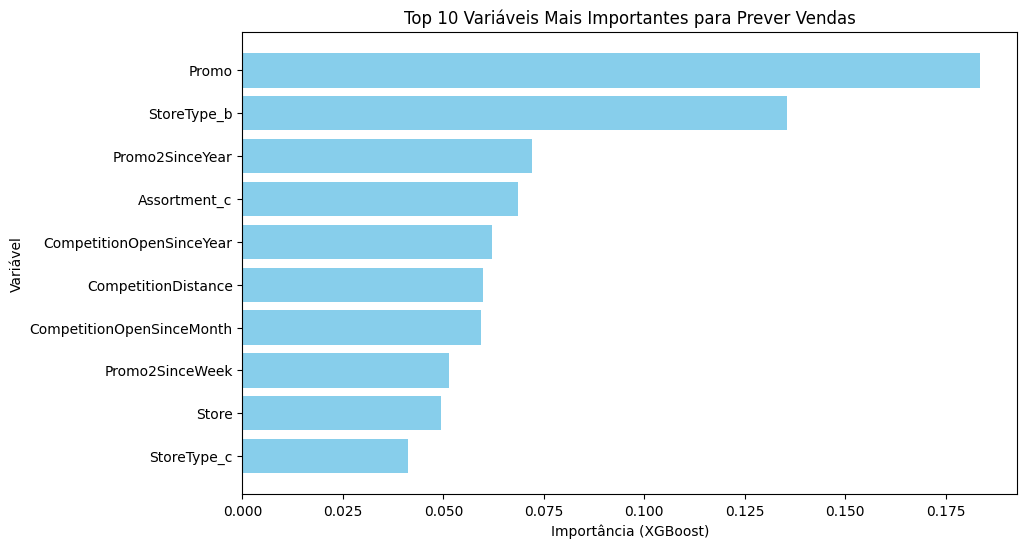

In [ ]:
# Etapa 5: Avaliação dos Modelos e Análise de Importância

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Fazer previsões com os dados de teste
print("--- Fazendo previsões nos dados de teste ---")
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# 2. Avaliar os modelos
print("\n--- Avaliação dos Modelos ---")

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Dicionário para armazenar os resultados
results = {}
results['Regressão Linear'] = evaluate_model(y_test, y_pred_linear)
results['Árvore de Decisão'] = evaluate_model(y_test, y_pred_tree)
results['XGBoost'] = evaluate_model(y_test, y_pred_xgb)

# Imprimir resultados em uma tabela
print(f"{'Modelo':<20} | {'MAE':<15} | {'RMSE':<15} | {'R²':<10}")
print("-" * 65)
for model, metrics in results.items():
    mae, rmse, r2 = metrics
    print(f"{model:<20} | {mae:<15.2f} | {rmse:<15.2f} | {r2:<10.4f}")

# 3. Análise de Importância das Variáveis (para o melhor modelo, XGBoost)
print("\n--- Variáveis mais importantes segundo o XGBoost ---")

# Criar um DataFrame com a importância de cada variável
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

# Exibir as 10 mais importantes
print(feature_importance.head(10))

# Plotar a importância das 10 principais variáveis
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'].head(10), feature_importance['importance'].head(10), color='skyblue')
plt.xlabel('Importância (XGBoost)')
plt.ylabel('Variável')
plt.title('Top 10 Variáveis Mais Importantes para Prever Vendas')
plt.gca().invert_yaxis() # Inverter o eixo para a mais importante ficar no topo
plt.show()